In [4]:
import random
import copy
import logging
import sys

from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210413_across_masked_noise_amp_random'

data_script = 'batch_210414_across_masked_noise'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim/' \
            f'{data_script}/'


scaled_noise = 1
core_noise = 0
n_mfs = 400
n_grcs = 2400

signal_ratio = .5
signal_type = 'random'

db = {}
model = 'scaleup4'
db[model] = compress_pickle.load(
    db_path+f'{data_script}_{model}_{n_grcs}_{n_mfs}_signal_ratio_{signal_ratio}_signal_type_{signal_type}_0.3_512_10.gz')
model = 'random'
db[model] = compress_pickle.load(
    db_path+f'{data_script}_{model}_{n_grcs}_{n_mfs}_signal_ratio_{signal_ratio}_signal_type_{signal_type}_0.3_512_10.gz')
model = 'naive_random4'
db[model] = compress_pickle.load(
    db_path+f'{data_script}_{model}_{n_grcs}_{n_mfs}_signal_ratio_{signal_ratio}_signal_type_{signal_type}_0.3_512_10.gz')

avg_grc_dim_list = defaultdict(list)
for ress in db['random']:
    ress_tries = ress
    for ress in ress_tries:
#         print(ress)
        for noise in ress:
            res = ress[noise]
            grc_dim = res['grc_dim']
            avg_grc_dim_list[noise].append(grc_dim)

avg_grc_dim = {}
for noise in avg_grc_dim_list:
    avg_grc_dim[noise] = sum(avg_grc_dim_list[noise])/len(avg_grc_dim_list[noise])

avg_grc_dim_list = defaultdict(list)
for ress in db['naive_random4']:
    ress_tries = ress
    for ress in ress_tries:
#         print(ress)
        for noise in ress:
            res = ress[noise]
            grc_dim = res['grc_dim']
            avg_grc_dim_list[noise].append(grc_dim)

avg_grc_dim2 = {}
for noise in avg_grc_dim_list:
    avg_grc_dim2[noise] = sum(avg_grc_dim_list[noise])/len(avg_grc_dim_list[noise])

In [5]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
#         'naive_random_17': "Local Random",
        'naive_random4': "Local Random",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['naive_random4']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}


mpd = MyPlotData()
ress_ref = db['naive_random4'][0][0]
resss_ref2 = db['naive_random4'][0]
for model_name in [
#         'global_random',
#         'naive_random_17',
        'random',
        'naive_random4',
        'scaleup4',
        ]:
    ress = db[model_name]
#     print(ress)
    ress_tries = ress[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
        if n_try >= len(resss_ref2):
            print(n_try)
            continue
        ress_ref2 = resss_ref2[n_try]
        for noise in ress:
    #         print(noise)
            res = ress[noise]
#             res_ref = ress_ref[noise]
            res_ref2 = ress_ref2[noise]
    #         hamming_distance_norm = res['hamming_distance']/res['num_grcs']
            mpd.add_data_point(
                model=name_map[model_name],
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/res_ref2['grc_dim'],
                grc_dim_norm2=res['grc_dim']/avg_grc_dim[noise],
                grc_dim_norm3=res['grc_dim']/avg_grc_dim2[noise],
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
#                 grc_by_mf_dim_ref=res['grc_dim']/res_ref['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                grc_pop_corr_norm=res['grc_pop_corr']/res_ref2['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

# importlib.reload(my_plot); my_plot.my_relplot(
#     mpd,
#     x='noise',
#     y='grc_dim',
#     hue='model',
#     context='paper',
#     palette=palette,
#     linewidth=1,
#     log_scale_y=True,
#     width=10,
# #     ylim=[0, None],
#     y_axis_label='Dim. Expansion ($x$)',
#     x_axis_label='MF Input Variation (%)',
#     title='noise',
#     save_filename=f'{script_n}_act_30.svg',
#     show=True,
#     )


Height: 2.5, Aspect: 1.4


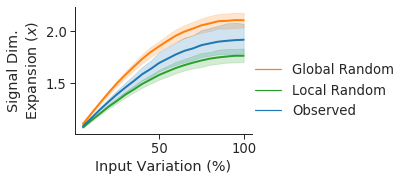

In [6]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
#     y='grc_dim',
    y='grc_by_mf_dim',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=2,
    width=3.5,
    height=2.5,
#     ylim=[.9, 1.1],
    y_axis_label='Signal Dim.\nExpansion ($x$)',
    x_axis_label='Input Variation (%)',
#     title='noise',
    save_filename=f'{script_n}_dim_expansion.svg',
    show=True,
    )


Height: 2.5, Aspect: 1.4


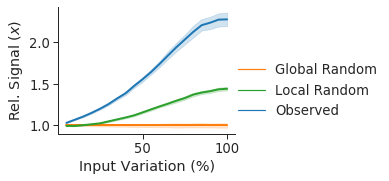

In [7]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim_norm2',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=2,
#     log_scale_y=True,
#     ci='sd',
    ci=68,
    width=3.5,
    height=2.5,
#     ylim=[0, 1.05],
    y_axis_label='Rel. Signal ($x$)',
    x_axis_label='Input Variation (%)',
#     title='noise',
    save_filename=f'{script_n}_rel_signal_strength.svg',
    show=True,
    )


Height: 2.5, Aspect: 1.4


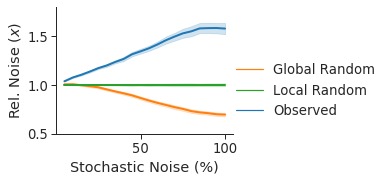

In [4]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim_norm3',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=2,
#     log_scale_y=True,
#     ci='sd',
    ci=68,
    width=3.5,
    height=2.5,
    ylim=[.5, 1.8],
    y_axis_label='Rel. Noise ($x$)',
    x_axis_label='Stochastic Noise (%)',
#     title='noise',
    save_filename=f'{script_n}_rel_noise_reduction2.svg',
    show=True,
    )


Height: 2.5, Aspect: 1.4


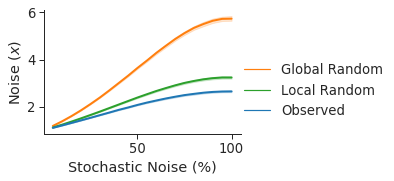

In [13]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=2,
#     log_scale_y=True,
#     ci='sd',
    ci=68,
    width=3.5,
    height=2.5,
#     ylim=[0, 1.05],
    y_axis_label='Noise ($x$)',
    x_axis_label='Stochastic Noise (%)',
#     title='noise',
    save_filename=f'{script_n}_noise_reduction.svg',
    show=True,
    )


Height: 3, Aspect: 1.1666666666666667


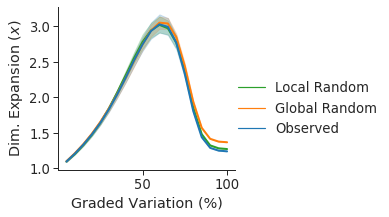

In [4]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_by_mf_dim',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=2,
#     log_scale_y=True,
#     ci='sd',
#     ci=68,
    width=3.5,
    height=3,
#     ylim=[.9, 1.1],
    y_axis_label='Dim. Expansion ($x$)',
    x_axis_label='Graded Variation (%)',
#     title='noise',
    save_filename=f'{script_n}_dim_expansion.svg',
    show=True,
    )
